In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Open the file and convert it to a dataframe at the same time.
data = pd.read_csv('id_data.csv')



# We can use Pandas’ str.split function to split the column 'Identifier Name'.
# str.split() with expand=True option results in a data frame, otherwise it 
# result in a Pandas Series object as output

df_idnames = data['Identifier Name'].str.split(expand = True)

df_idnames

,0,1,2,3,4,5,6,7,8,9
0,ares,expand,name,for,response,None,None,None,None,None
1,BKE,lattice,index,flip,None,None,None,None,None,None
2,BLI,str,r,strip,None,None,None,None,None,None
3,Delete,Input,None,None,None,None,None,None,None,None
4,dialog,info,update,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1330,Tsurgeon,Parse,Exception,None,None,None,None,None,None,None
1331,Value,Label,None,None,None,None,None,None,None,None
1332,Verification,Mode,Factory,None,None,None,None,None,None,None
1333,Web,Socket,Listener,None,None,None,None,None,None,None


In [2]:
df_idnames[0] = df_idnames[0].str.lower()
df_idnames[1] = df_idnames[1].str.lower()
df_idnames[2] = df_idnames[2].str.lower()
df_idnames[3] = df_idnames[3].str.lower()
df_idnames[4] = df_idnames[4].str.lower()
df_idnames[5] = df_idnames[5].str.lower()
df_idnames[6] = df_idnames[6].str.lower()
df_idnames

,0,1,2,3,4,5,6,7,8,9
0,ares,expand,name,for,response,None,None,None,None,None
1,bke,lattice,index,flip,None,None,None,None,None,None
2,bli,str,r,strip,None,None,None,None,None,None
3,delete,input,None,None,None,None,None,None,None,None
4,dialog,info,update,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1330,tsurgeon,parse,exception,None,None,None,None,None,None,None
1331,value,label,None,None,None,None,None,None,None,None
1332,verification,mode,factory,None,None,None,None,None,None,None
1333,web,socket,listener,None,None,None,None,None,None,None


In [3]:
df0 = pd.DataFrame(df_idnames[0].value_counts())
df1 = pd.DataFrame(df_idnames[1].value_counts())
df2 = pd.DataFrame(df_idnames[2].value_counts())
df3 = pd.DataFrame(df_idnames[3].value_counts())
df4 = pd.DataFrame(df_idnames[4].value_counts())
df5 = pd.DataFrame(df_idnames[5].value_counts())



In [4]:
df0.rename(columns = {0: 'Pos_1'}, inplace=True)
df1.rename(columns = {1: 'Pos_2'}, inplace=True)
df2.rename(columns = {2: 'Pos_3'}, inplace=True)
df3.rename(columns = {3: 'Pos_4'}, inplace=True)
df4.rename(columns = {4: 'Pos_5'}, inplace=True)
df5.rename(columns = {5: 'Pos_6'}, inplace=True)


In [5]:
df = pd.concat([df0, df1], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True, sort=True)


df = pd.concat([df, df2], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True, sort=True)

df = pd.concat([df, df3], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True, sort=True)

df = pd.concat([df, df4], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True, sort=True)

df = pd.concat([df, df5], axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True, sort=True)

df = df.fillna(0)

df = df[["Pos_1", "Pos_2", "Pos_3", "Pos_4", "Pos_5", "Pos_6"]].astype(int)


#Total sum per row: 
df.loc[:,'Total'] = df.sum(axis=1)

# Filter out rows where total is less than 2
df = df[df['Total'] > 1]

df['Token'] = df.index

df.reset_index(drop=True, inplace=True)

df.head()

,Pos_1,Pos_2,Pos_3,Pos_4,Pos_5,Pos_6,Total,Token
0,38,0,0,0,0,0,38,get
1,29,0,0,0,0,0,29,m
2,21,0,0,0,0,0,21,is
3,18,0,0,0,0,0,18,num
4,14,0,0,0,0,0,14,default


In [6]:
df.tail()

,Pos_1,Pos_2,Pos_3,Pos_4,Pos_5,Pos_6,Total,Token
557,0,0,0,2,0,0,2,get
558,0,0,0,2,0,0,2,args
559,0,0,0,0,3,0,3,response
560,0,0,0,0,2,0,2,init
561,0,0,0,0,2,0,2,string


In [11]:
df.to_csv('idName_table.csv')

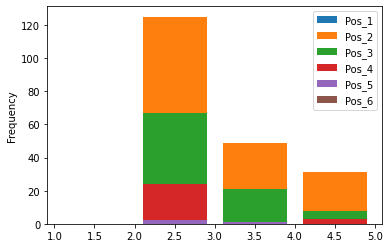

In [8]:
df[['Pos_1','Pos_2','Pos_3', 'Pos_4', 'Pos_5', 'Pos_6']].plot(kind='hist',bins=[1,2,3,4,5],rwidth=0.8)
plt.show()

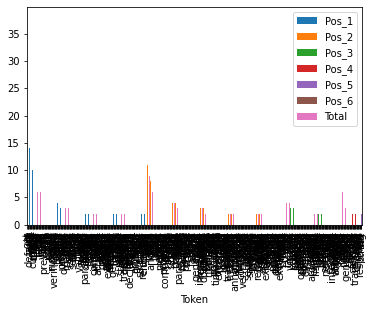

In [9]:
df.plot('Token',kind = 'bar')
plt.show()

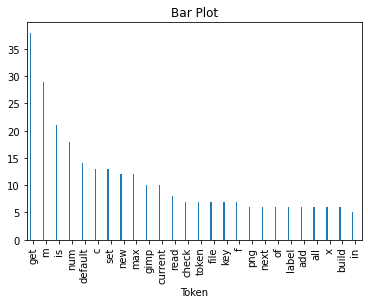

In [10]:
df1=df.loc[:25,['Token','Pos_1','Pos_2','Pos_3','Pos_4', 'Pos_5']]

ax=df1.plot('Token',['Pos_1','Pos_2','Pos_3','Pos_4', 'Pos_5'], kind = 'bar', title ='Bar Plot', legend=None)
#table(ax, np.round(df1.describe(), 2),loc='upper right')